In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import numpy as np
import re
import random
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")
sns.palplot(palette)
%matplotlib inline

In [2]:
#setting the number of rows in display 
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 120)


In [3]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\raman\\MyCourse\\Case Study'

In [4]:
LoanCsvFileName = cwd+os.sep+'dataset' + os.sep + 'loan.csv'
loans = pd.read_csv(LoanCsvFileName)
loans.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loans.shape

(39717, 111)

## Variable Definitions from Data Dictionary

In [6]:
#pd.set_option('display.width', 500)
pd.options.display.max_colwidth=500
ddExcelFileName = cwd+os.sep+'dataset' + os.sep + 'Data_Dictionary.xlsx'
datadictionary=pd.read_excel(ddExcelFileName)
datadictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
114,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
115,NaN,NaN


In [7]:

def getmetadata(x):
    return x in loans.columns

#datadictionary.applymap(lambda x: x if(x in loans.columns) else None)\
#datadictionary.apply(lambda x: x if(x in list(loans.columns)) else None)
#pd.set_option('display.width', 500)
datadictionary[datadictionary['LoanStatNew'].map(getmetadata)]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
108,total_rec_late_fee,Late fees received to date
109,total_rec_prncp,Principal received to date
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"


## Data Cleaning

#### Check for NULL values

In [8]:
##Checking NULL columns
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
loans=loans.dropna(axis = 1, how = 'all')

###### Removed 54 empty columns from 111 columns 

In [10]:
loans.shape

(39717, 57)

In [11]:
###
#checking how many unique values are there in each column
#data.nunique().sort_values()
loans.nunique().sort_values()


tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

###### - Single Valued Columns are not of use for our analysis.

In [12]:
###
#checking how many unique values are there in each column and removing single columns
loan_cnts = loans.nunique().sort_values()
#loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [13]:
loan_cnts[loan_cnts[:]==1]

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
dtype: int64

###### Removing columns having single values 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status'

In [14]:
single_loan_cnts = loan_cnts[loan_cnts[:]==1]

In [15]:
#dropping all the columns that have unique value equals to 1
loans=loans.drop(columns = single_loan_cnts.index)
#checking shape
loans.shape

(39717, 48)

###### Current Columns post cleaning : 48 columns 


In [16]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


In [17]:
## Understand the fields after Cleaning
datadictionary[datadictionary['LoanStatNew'].map(getmetadata)]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
23,funded_amnt,The total amount committed to that loan at that point in time.


In [18]:
### Function to get the definition description

In [19]:
def getdatadefn(defn):
    return datadictionary[datadictionary['LoanStatNew']==defn]


### Data Validation 

###### Total acct (The total number of credit lines currently in the borrower's credit file) should not be less than open acct (The number of open credit lines in the borrower's credit file)

In [20]:
## Total acct 
loans[loans['total_acc']<loans['open_acc']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
39642,127213,85483,2000,2000,1575.0,36 months,7.12%,61.87,A,A1,...,2000.0,219.43,0.0,0.0,0.0,Apr-10,3.06,NaN,Apr-10,NaN


In [21]:
loans=loans[loans['total_acc']>=loans['open_acc']]

In [22]:
## Verify Number of records with Open acct should be less than Total acct is zero
loans[loans['total_acc']<loans['open_acc']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [23]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
getdatadefn('funded_amnt')

,LoanStatNew,Description
23,funded_amnt,The total amount committed to that loan at that point in time.


In [25]:
getdatadefn('loan_amnt')

,LoanStatNew,Description
41,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


In [26]:
getdatadefn('funded_amnt_inv')

,LoanStatNew,Description
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.


 ##### Total amount committed by investors should always be lesser than  Funded Amount

In [27]:
loans[loans['funded_amnt_inv']>loans['funded_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


 ##### Funded Amount should always be lesser than  applied loan amount

In [28]:
loans[loans['funded_amnt']>loans['loan_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [29]:
 ##### Check if ID is repeated in Member ID

In [30]:
loans[loans['id']==loans['member_id']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


#### Data Type Conversions 

In [31]:
# checking the data types

loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39716 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39716 non-null  int64  
 1   member_id                39716 non-null  int64  
 2   loan_amnt                39716 non-null  int64  
 3   funded_amnt              39716 non-null  int64  
 4   funded_amnt_inv          39716 non-null  float64
 5   term                     39716 non-null  object 
 6   int_rate                 39716 non-null  object 
 7   installment              39716 non-null  float64
 8   grade                    39716 non-null  object 
 9   sub_grade                39716 non-null  object 
 10  emp_title                37257 non-null  object 
 11  emp_length               38641 non-null  object 
 12  home_ownership           39716 non-null  object 
 13  annual_inc               39716 non-null  float64
 14  verification_status   

In [32]:
# The column int_rate is character type, let's convert it to float
loans['int_rate'] = loans['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [33]:
loans['revol_util'].dtypes

dtype('O')

In [34]:
# The column revol_util is character type
loans['revol_util'] = loans['revol_util'].apply(lambda x: str(x))

In [35]:
loans['revol_util']= loans['revol_util'].apply(lambda x: x[:-1])

In [36]:
loans[loans['revol_util']=='na']['revol_util']

3565     na
4714     na
4943     na
11282    na
12042    na
12147    na
13891    na
17985    na
18184    na
21604    na
24663    na
24738    na
24984    na
25261    na
25977    na
26649    na
26724    na
26813    na
28170    na
28685    na
28938    na
28986    na
29236    na
29248    na
31862    na
31939    na
32715    na
33078    na
33490    na
33534    na
34268    na
34849    na
35851    na
36209    na
36473    na
36859    na
37042    na
37268    na
37540    na
37709    na
37757    na
37778    na
37911    na
38201    na
38457    na
38524    na
38899    na
38917    na
38949    na
38970    na
Name: revol_util, dtype: object

In [37]:
loans['revol_util']= loans['revol_util'].apply(lambda x: 0 if x == 'na' else x)

In [38]:
loans['revol_util']=loans['revol_util'].astype('float32')

In [39]:
loans.nunique().sort_values(ascending=False)


id                         39716
url                        39716
member_id                  39716
total_pymnt                37849
total_pymnt_inv            37517
total_rec_int              35147
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15382
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [40]:
loans['revol_util'].dtypes

dtype('float32')

In [41]:
len(loans.columns)

48

From above we can say that, column named "id, url and member_id" are having same number of unique value that of number of rows in dataframe. So, in this case we can remove two columns i.e. url and member_id as we required only one primary key.

## Column Analysis

In [42]:
loans.nunique().sort_values(ascending=False).head(20)

id                         39716
url                        39716
member_id                  39716
total_pymnt                37849
total_pymnt_inv            37517
total_rec_int              35147
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15382
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
dtype: int64

- columns such as "id", "member_id", "url" are person identifiers and are not relevant for our analysis. Hence removing them

In [43]:
loans[["title" ,"emp_title", "zip_code"]]

,title,emp_title,zip_code
0,Computer,NaN,860xx
1,bike,Ryder,309xx
2,real estate business,NaN,606xx
3,personel,AIR RESOURCES BOARD,917xx
4,Personal,University Medical Group,972xx
...,...,...,...
39712,Home Improvement,FiSite Research,802xx
39713,Retiring credit card debt,"Squarewave Solutions, Ltd.",274xx
39714,MBA Loan Consolidation,NaN,017xx
39715,JAL Loan,NaN,208xx


- columns such as "title", "emp_title", "zip_code" are person identifiers and are not relevant for our analysis. Hence removing them

#### Assumptions/Analysis For Columns considered irrelevant
- We are supposed to analyse the user details and the driving factors of loan defaulting prior approving loan.
So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as  "last_credit_pull_d", "addr_state".
The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

#### _Dropping below columns_

- id 
- member_id
- url
- title
- emp_title
- zip_code
- last_credit_pull_d
- addr_state
- desc
- out_prncp_inv
- total_pymnt_inv
- funded_amnt
- delinq_2yrs
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee 
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- mths_since_last_delinq
- mths_since_last_record

In [44]:
loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971600e+04,3.971600e+04,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,3.971600e+04,39716.000000,39716.000000,...,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,39716.000000,39020.000000
mean,6.831459e+05,8.504828e+05,11219.675949,10947.938488,10397.671006,12.021300,324.568536,6.896769e+04,13.315454,0.146515,...,50.991052,12153.846674,11567.396357,9793.545040,2263.714643,1.363050,95.224021,12.406424,2678.893535,0.043260
std,2.106783e+05,2.656539e+05,7456.621058,7187.188910,7128.402714,3.724791,208.873344,6.379409e+04,6.678365,0.491817,...,373.829076,9042.017191,8942.649454,7065.502855,2608.124627,7.290068,688.753276,148.673452,4447.171730,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162240e+05,6.667860e+05,5500.000000,5400.000000,5000.000000,9.250000,167.027500,4.040300e+04,8.177500,0.000000,...,0.000000,5577.020000,5112.452500,4600.000000,662.262500,0.000000,0.000000,0.000000,218.740000,0.000000
50%,6.656790e+05,8.508205e+05,10000.000000,9600.000000,8975.000000,11.860000,280.230000,5.900000e+04,13.400000,0.000000,...,0.000000,9899.946595,9287.630000,8000.000000,1349.210000,0.000000,0.000000,0.000000,546.150000,0.000000
75%,8.377585e+05,1.047342e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,...,0.000000,16534.569338,15799.090000,13653.605000,2833.480000,0.000000,0.000000,0.000000,3293.272500,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [45]:
loans.nunique().sort_values(ascending=False)

id                         39716
url                        39716
member_id                  39716
total_pymnt                37849
total_pymnt_inv            37517
total_rec_int              35147
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15382
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
mths_since_last_record       111
last_credit_pull_d           106
last_pymnt_d                 101
mths_since

In [46]:
loans = loans.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1)

In [47]:
loans.shape

(39716, 24)

### A Quick Glance on Univariate Analysis

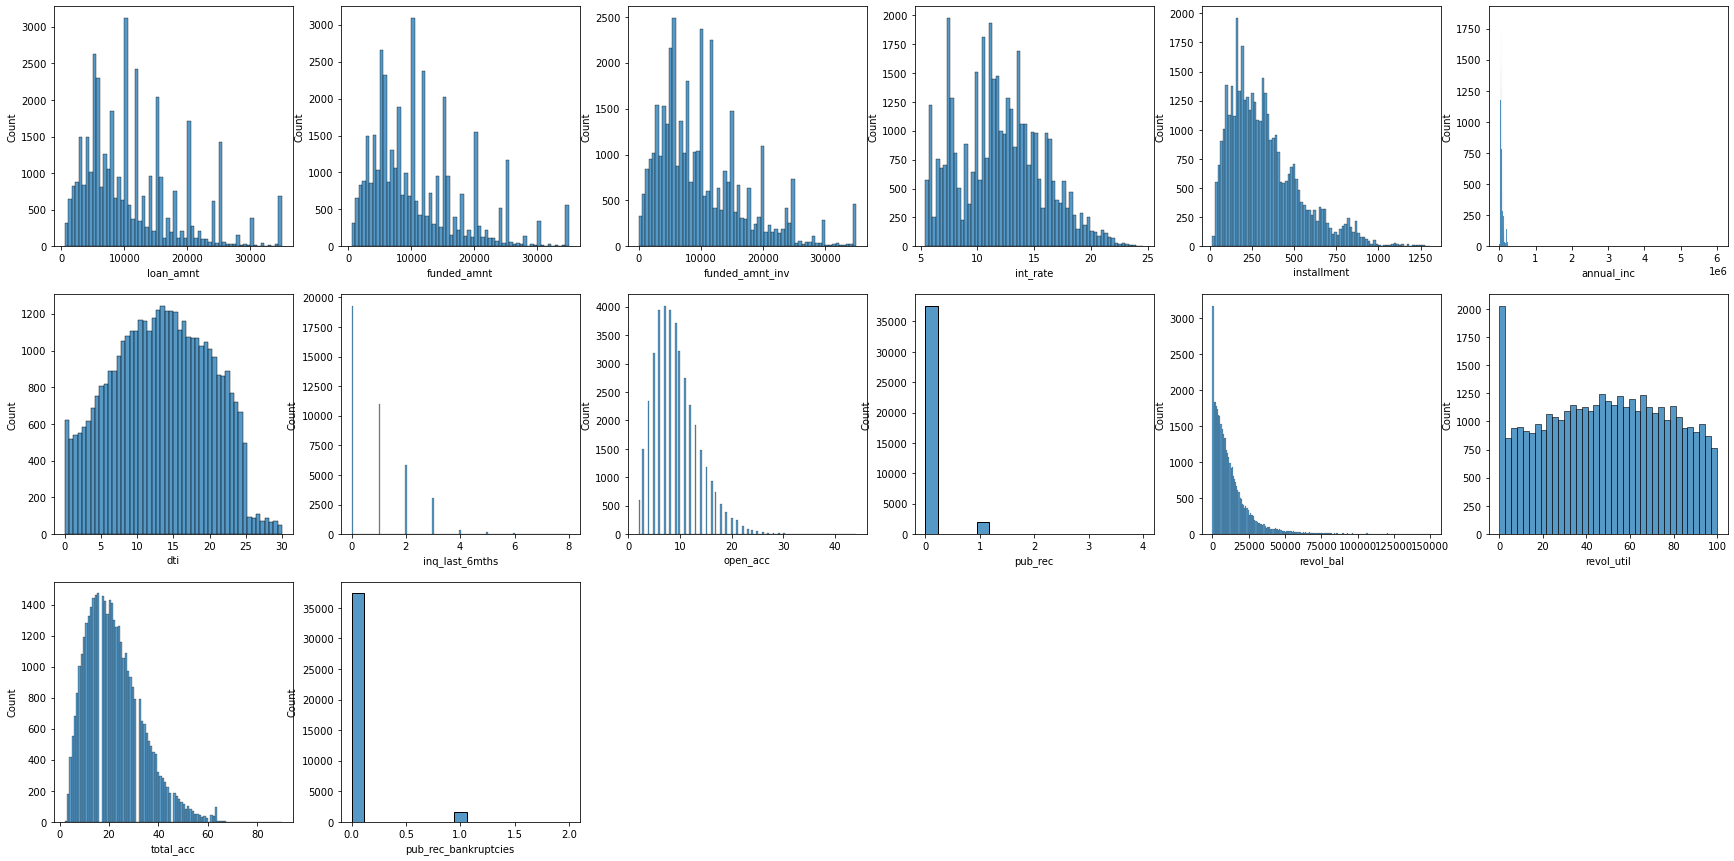

In [48]:
cols = 6
rows = 3
num_cols = loans.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = loans[col], ax = ax)
    
#fig.tight_layout()  
plt.show()

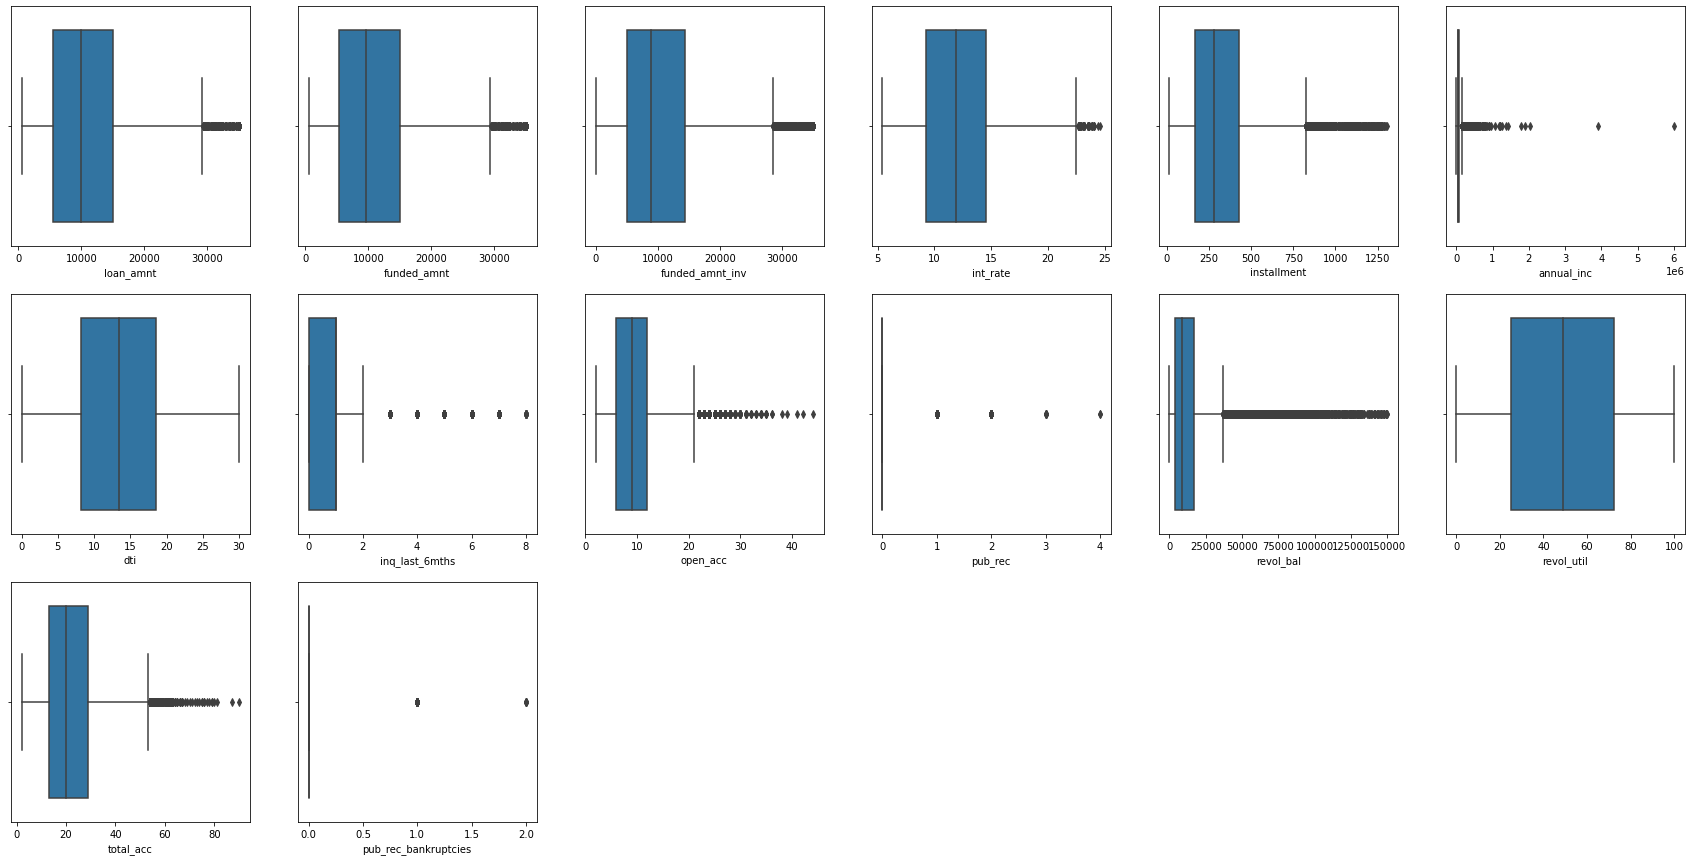

In [49]:
cols = 6
rows = 3
num_cols = loans.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = loans[col], ax = ax)
    
#fig.tight_layout()  
plt.show()

In [50]:
loans['loan_status'] = loans['loan_status'].astype('category')
loans['loan_status'].value_counts()


Fully Paid     32949
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [51]:
percent100 = loans['loan_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent100

Fully Paid     83.0%
Charged Off    14.2%
Current         2.9%
Name: loan_status, dtype: object

#### Removing loan_status having value as 'Current' as it cannot have an impact on our analysis

In [52]:
# Removing loan_status having value as 'Current' 
#loans.drop(loans.loc[loans['loan_status']=='Current'].index,inplace=True)

loans = loans.drop(loans.index[loans['loan_status'] == 'Current'])

In [53]:
loans['loan_status']=loans['loan_status'].cat.remove_unused_categories()

In [54]:
#loans=loans['loan_status'].cat.remove_unused_categories().value_counts() 

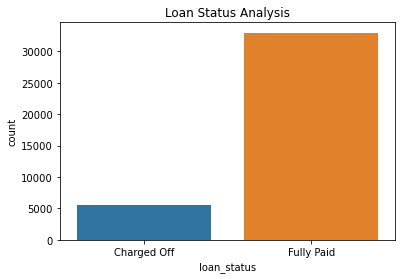

In [55]:
fig, ax = plt.subplots()

sns.countplot(x= loans["loan_status"],orient="v",dodge=False,linewidth=3).set(title="Loan Status Analysis")
plt.show()

**Observations:**
1. Most of the loans are Fully Paid.
2. About 14% of loan are having status as defaulters.
3. About 2% of loan are current.

In [56]:
loans.shape

(38576, 24)

In [57]:
getdatadefn('grade')

,LoanStatNew,Description
25,grade,LC assigned loan grade


In [58]:

loans['grade'] = loans['grade'].astype('category')
loans['grade']

0        B
1        C
2        C
3        C
5        A
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 38576, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

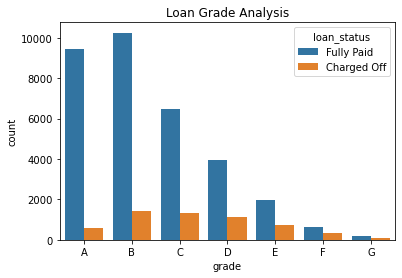

In [59]:
plot_order=sorted(loans['grade'].unique())
sns.countplot(x='grade', data=loans,hue='loan_status',hue_order=['Fully Paid','Charged Off'], order=plot_order).set(title="Loan Grade Analysis")
plt.show()

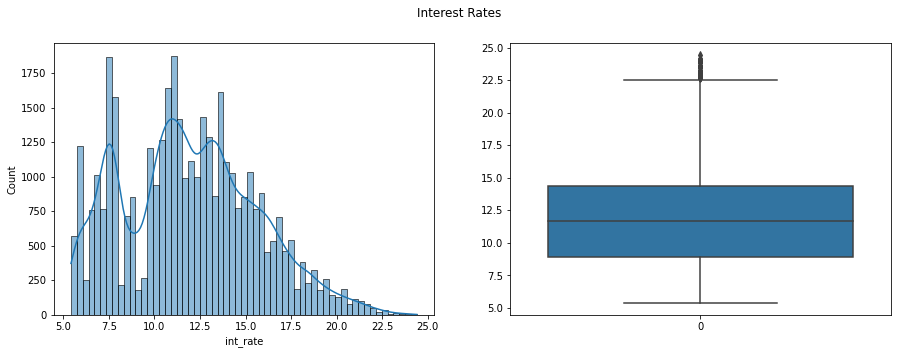

In [60]:
plt.figure(figsize=(15,5))
#subplot 1
plt.subplot(1,2,1)
#Histogram
sns.histplot(data=loans['int_rate'], kde=True)
# subplot 2
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loans['int_rate'])
plt.suptitle('Interest Rates')
plt.show()


In [61]:
loans[['int_rate','grade']]

,int_rate,grade
0,10.65,B
1,15.27,C
2,15.96,C
3,13.49,C
5,7.90,A
...,...,...
39712,8.07,A
39713,10.28,C
39714,8.07,A
39715,7.43,A


In [62]:
loans['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

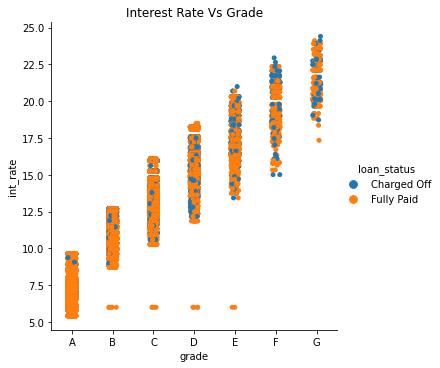

In [63]:
ax = sns.catplot(x="grade", y="int_rate", data=loans,hue="loan_status")
ax.set(title="Interest Rate Vs Grade")

C:\Users\raman\AppData\Local\Temp/ipykernel_32024/840749006.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.boxplot(x='grade',


[Text(0.5, 1.0, 'Interest Rate Vs Grade')]

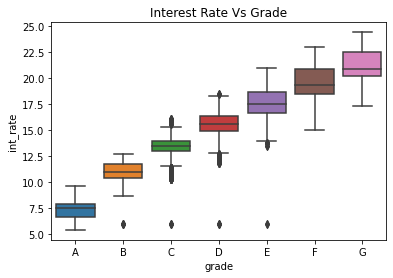

In [64]:
sns.boxplot(x='grade',
            y='int_rate',
            data=loans).set(Title="Interest Rate Vs Grade")

**Observations:**
1. LC assigned loan grade Grade of A and B have high number of  loans
2. More the Grade higher the interest 

In [65]:
getdatadefn('funded_amnt')

,LoanStatNew,Description
23,funded_amnt,The total amount committed to that loan at that point in time.


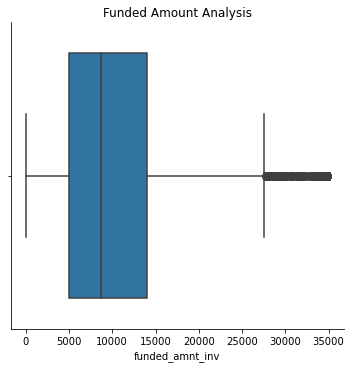

In [66]:
### Funded Amount Vs Grade

#plot_order = loans.groupby('grade')['funded_amnt'].sum().sort_values(ascending=False).index.values

ax = sns.catplot( x="funded_amnt_inv", data=loans,kind="box")
ax.set(title='Funded Amount Analysis')
plt.show()

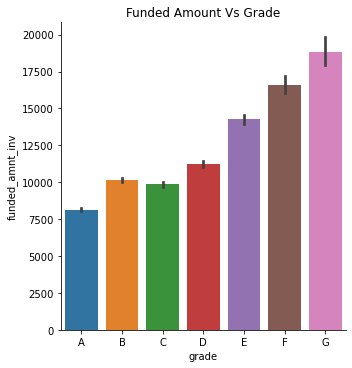

In [67]:
### Funded Amount Vs Grade

#plot_order = loans.groupby('grade')['funded_amnt'].sum().sort_values(ascending=False).index.values
plot_order=sorted(loans['grade'].unique())
ax = sns.catplot(x="grade", y="funded_amnt_inv", data=loans,kind="bar",order=plot_order)
ax.set(title='Funded Amount Vs Grade')
plt.show()

#### Observation

- The total amount committed to that loan  increases along with the Grade 

In [68]:
from datetime import datetime
loans['issue_d'] = loans['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [69]:
# extracting month and year from issue_date
loans['month'] = loans['issue_d'].apply(lambda x: x.month)
loans['year'] = loans['issue_d'].apply(lambda x: x.year)

In [70]:
# let's first observe the number of loans granted across years
loans.groupby('year').year.count()

year
2007      250
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

C:\Users\raman\AppData\Local\Temp/ipykernel_32024/2174302073.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x='year', data=loans,hue='loan_status').set(Title="Year-wise Loan Trend ")


[Text(0.5, 1.0, 'Year-wise Loan Trend ')]

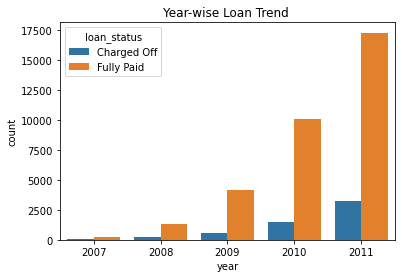

In [71]:
sns.countplot(x='year', data=loans,hue='loan_status').set(Title="Year-wise Loan Trend ")


**Observations:**
- We can see that the number of loans has increased steadily across years.

In [72]:
# number of loans across months
loans.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3497
10    3761
11    4006
12    4215
Name: month, dtype: int64

C:\Users\raman\AppData\Local\Temp/ipykernel_32024/1317858554.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x='month', data=loans).set(Title="Month-wise Loan Trend ")


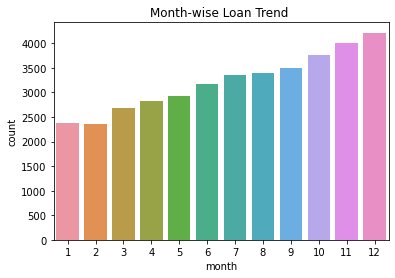

In [73]:
sns.countplot(x='month', data=loans).set(Title="Month-wise Loan Trend ")
plt.show()

**Observations:**
- Most loans are granted in December, and in general in the latter half of the year.

loans['purpose'].value_counts()

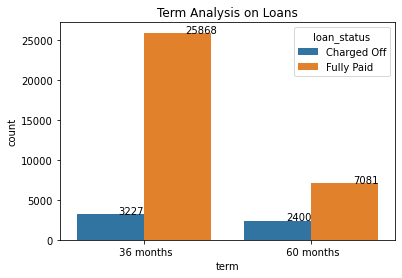

In [74]:
#loans['term']
ax = sns.countplot(x='term', data=loans,hue='loan_status')

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax.set(title="Term Analysis on Loans")

plt.show()

**Observations:**
- Short Term Loans are repaid in full
- Propotionately Long Term Loans are having high propation of defaults 

C:\Users\raman\AppData\Local\Temp/ipykernel_32024/241993003.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


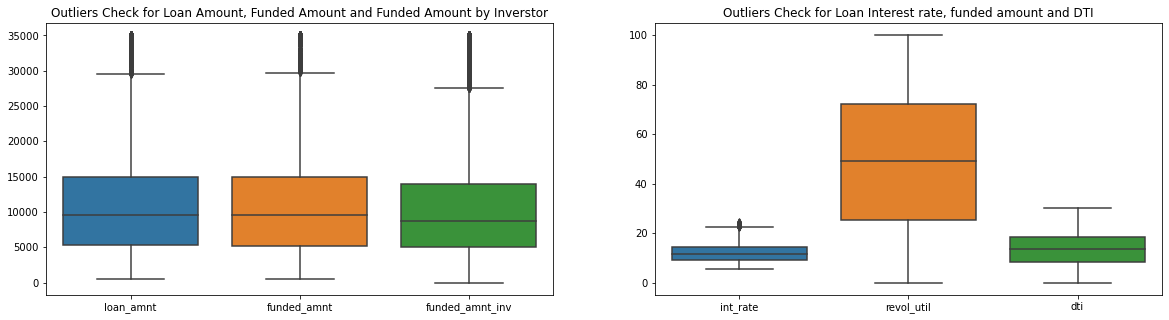

In [75]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(data=loans[['loan_amnt','funded_amnt','funded_amnt_inv']], ax=ax0)
ax0.set_title('Outliers Check for Loan Amount, Funded Amount and Funded Amount by Inverstor')
sns.boxplot(data=loans[['int_rate','revol_util','dti']], ax=ax1)
ax1.set_title('Outliers Check for Loan Interest rate, funded amount and DTI')
fig.show()

## *Bivariant Analysis*

In [76]:
loans.groupby(by=["grade"])['loan_status'].value_counts()


grade             
A      Fully Paid      9442
       Charged Off      602
B      Fully Paid     10250
       Charged Off     1425
C      Fully Paid      6487
       Charged Off     1347
D      Fully Paid      3967
       Charged Off     1118
E      Fully Paid      1948
       Charged Off      715
F      Fully Paid       657
       Charged Off      319
G      Fully Paid       198
       Charged Off      101
Name: loan_status, dtype: int64

In [77]:
grade_df=loans.groupby(by=["grade"])['loan_status'].value_counts(normalize=True)


In [78]:
grade_df

grade             
A      Fully Paid     0.940064
       Charged Off    0.059936
B      Fully Paid     0.877944
       Charged Off    0.122056
C      Fully Paid     0.828057
       Charged Off    0.171943
D      Fully Paid     0.780138
       Charged Off    0.219862
E      Fully Paid     0.731506
       Charged Off    0.268494
F      Fully Paid     0.673156
       Charged Off    0.326844
G      Fully Paid     0.662207
       Charged Off    0.337793
Name: loan_status, dtype: float64

In [79]:
grade_df=grade_df.reset_index(name='Percent')

In [80]:
grade_df

,grade,level_1,Percent
0,A,Fully Paid,0.940064
1,A,Charged Off,0.059936
2,B,Fully Paid,0.877944
3,B,Charged Off,0.122056
4,C,Fully Paid,0.828057
5,C,Charged Off,0.171943
6,D,Fully Paid,0.780138
7,D,Charged Off,0.219862
8,E,Fully Paid,0.731506
9,E,Charged Off,0.268494


C:\Users\raman\AppData\Local\Temp/ipykernel_32024/2818013444.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  g.ax.set(Title="Grade Vs Loan Status Analysis ")


[Text(0.5, 1.0, 'Grade Vs Loan Status Analysis ')]

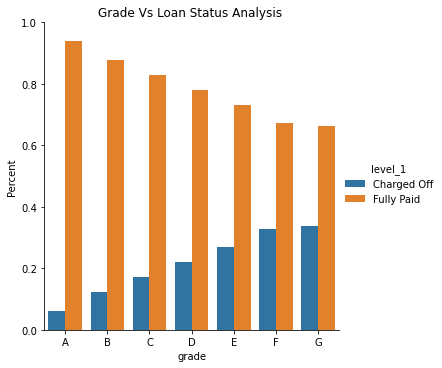

In [81]:
g = sns.catplot(x='grade', y='Percent',hue='level_1', kind='bar', data=grade_df)
g.ax.set_ylim(0,1.0)
g.ax.set(Title="Grade Vs Loan Status Analysis ")

**Observation**

In [82]:
getdatadefn('dti')

,LoanStatNew,Description
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."


In [83]:
loans.groupby(by=["dti"])['loan_status'].value_counts()

dti               
0.00   Fully Paid     149
       Charged Off     29
0.01   Fully Paid       2
       Charged Off      1
0.02   Fully Paid       5
                     ... 
29.92  Charged Off      0
29.93  Fully Paid       3
       Charged Off      0
29.99  Fully Paid       1
       Charged Off      0
Name: loan_status, Length: 5706, dtype: int64

In [84]:
dti_df=loans.groupby(by=["dti"])['loan_status'].value_counts(normalize=True)

In [85]:
dti_df=dti_df.reset_index(name='Percent')

In [86]:
dti_df

,dti,level_1,Percent
0,0.00,Fully Paid,0.837079
1,0.00,Charged Off,0.162921
2,0.01,Fully Paid,0.666667
3,0.01,Charged Off,0.333333
4,0.02,Fully Paid,1.000000
...,...,...,...
5701,29.92,Charged Off,0.000000
5702,29.93,Fully Paid,1.000000
5703,29.93,Charged Off,0.000000
5704,29.99,Fully Paid,1.000000


In [87]:
dti_df.columns

Index(['dti', 'level_1', 'Percent'], dtype='object')

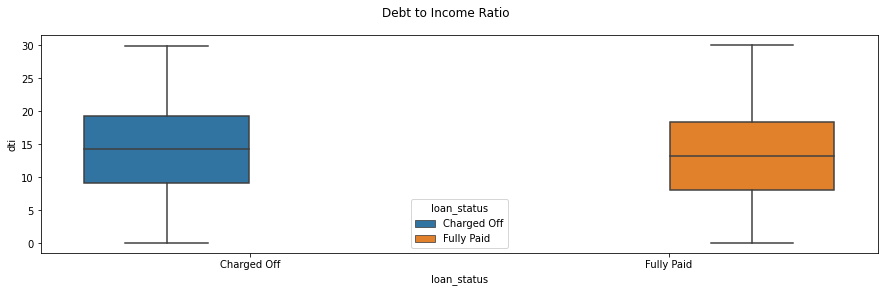

In [88]:

#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
#plt.subplot(1,2,1)

#Distribution plot
#g = sns.catplot(x='loan_status', y='Percent',hue='dti',  data=dti_df)
#g.ax.set_ylim(0,1.0)
#sns.histplot(y='dti',x='loan_status', data=loans,hue='loan_status',element="step")
#sns.catplot(y='dti',x='loan_status', data=loans,hue='loan_status')

sns.boxplot(y='dti',x='loan_status', data=loans,hue='loan_status')


#Single title for both subplots.
plt.suptitle('Debt to Income Ratio')
plt.show()

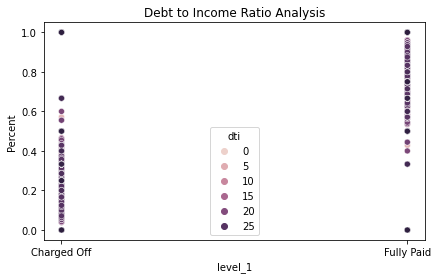

In [89]:

#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
g = sns.scatterplot(x='level_1', y='Percent',hue='dti',  data=dti_df)
g.set(title='Debt to Income Ratio Analysis')
#g.ax.set_ylim(0,1.0)
#sns.histplot(x='dti', data=loans,hue='loan_status',element="step")




#Single title for both subplots.
#plt.suptitle('Debt to Income Ratio')
plt.show()

# Derived Column -Closed Acct

In [90]:
getdatadefn('total_acc')

,LoanStatNew,Description
99,total_acc,The total number of credit lines currently in the borrower's credit file


In [91]:
getdatadefn('open_acc')

,LoanStatNew,Description
73,open_acc,The number of open credit lines in the borrower's credit file.


In [92]:
loans['closed_acc']=loans['total_acc']-loans['open_acc']

In [93]:
loans['closed_acc'].value_counts()

5     1905
6     1902
7     1897
4     1834
8     1826
      ... 
75       1
66       1
57       1
58       1
71       1
Name: closed_acc, Length: 63, dtype: int64

**Observation**
Higher closed_acct infers, many loans have been closed by the individual 

[Text(0.5, 1.0, 'Closed Loan Acct Vs Grade')]

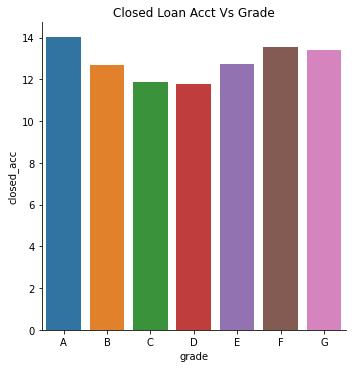

In [94]:
g = sns.catplot(x='grade', y='closed_acc',kind='bar', data=loans,order=plot_order,ci=None )
g.ax.set(title="Closed Loan Acct Vs Grade")

**Observation**
> Grade D & C to be deliquent in closing the loans

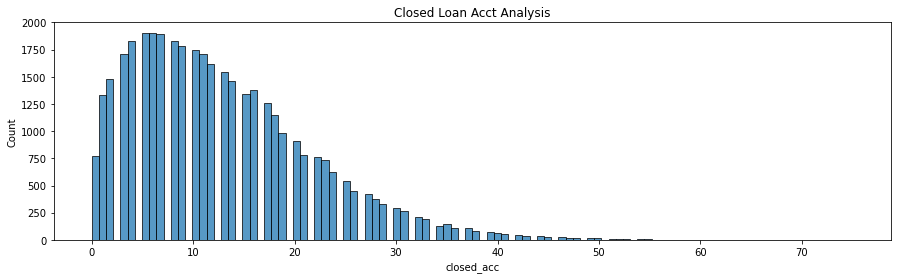

In [95]:
plt.figure(figsize=(15,4))
sns.histplot(x='closed_acc',   data=loans).set(title="Closed Loan Acct Analysis")
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


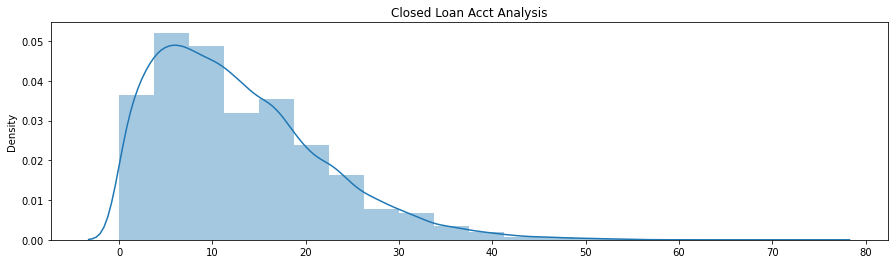

In [96]:
plt.figure(figsize=(15,4))
sns.distplot(x=loans['closed_acc'], bins=20).set(title="Closed Loan Acct Analysis")
plt.show()

In [97]:
getdatadefn('open_acc')

,LoanStatNew,Description
73,open_acc,The number of open credit lines in the borrower's credit file.


In [98]:
getdatadefn('total_acc')

,LoanStatNew,Description
99,total_acc,The total number of credit lines currently in the borrower's credit file


C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\raman\AppData\Local\Temp/ipykernel_32024/3829927321.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


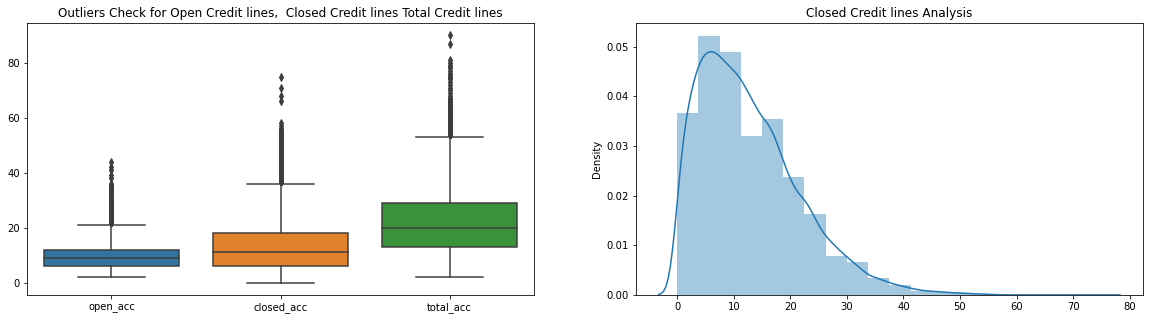

In [99]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(data=loans[['open_acc','closed_acc','total_acc']], ax=ax0)
ax0.set_title('Outliers Check for Open Credit lines,  Closed Credit lines Total Credit lines')
sns.distplot(x=loans['closed_acc'], bins=20).set(title="Closed Credit Line Analysis")
#sns.histplot(x='closed_acc',   data=loans, ax=ax1).set(title="Closed Loan Acct Analysis")
#sns.boxplot(data=loans[['int_rate','revol_util','dti']], ax=ax1)
ax1.set_title('Closed Credit lines Analysis')
fig.show()

In [100]:
loans[['open_acc','closed_acc','total_acc']].describe()

,open_acc,closed_acc,total_acc
count,38576.000000,38576.000000,38576.000000
mean,9.275301,12.777712,22.053012
std,4.401580,8.988324,11.425785
min,2.000000,0.000000,2.000000
25%,6.000000,6.000000,13.000000
50%,9.000000,11.000000,20.000000
75%,12.000000,18.000000,29.000000
max,44.000000,75.000000,90.000000


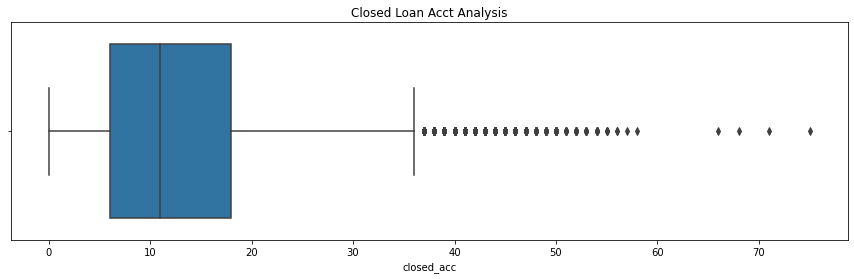

In [101]:
plt.figure(figsize=(15,4))
sns.boxplot(x='closed_acc',   data=loans).set(title="Closed Loan Acct Analysis")
plt.show()

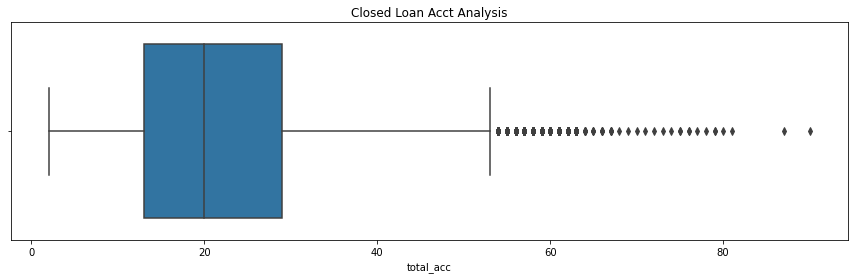

In [102]:
plt.figure(figsize=(15,4))
sns.boxplot(x='total_acc',  data=loans).set(title="Closed Loan Acct Analysis")
plt.show()

In [103]:
loans['closed_acc'].describe()

count    38576.000000
mean        12.777712
std          8.988324
min          0.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         75.000000
Name: closed_acc, dtype: float64

**Observation**
> Closed Acct are Left Skewed 

<AxesSubplot:xlabel='closed_acc', ylabel='count'>

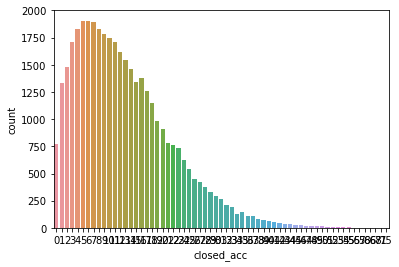

In [104]:
plot_order=sorted(loans['grade'].unique())
sns.countplot(x='closed_acc',   data=loans)



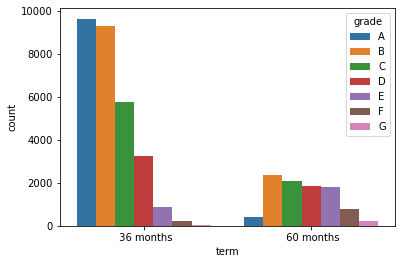

In [105]:
sns.countplot(x='term', data=loans,hue='grade')
plt.show()

**Observations:**
- Less Risky Grades ( A,B,C) are being paid short term loans 
- High Risky Grades are being given long term loans Term Loans have high propation of defaults 

In [106]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

In [107]:
getdatadefn('pub_rec_bankruptcies')

,LoanStatNew,Description
86,pub_rec_bankruptcies,Number of public record bankruptcies


In [108]:
getdatadefn('pub_rec')

,LoanStatNew,Description
85,pub_rec,Number of derogatory public records


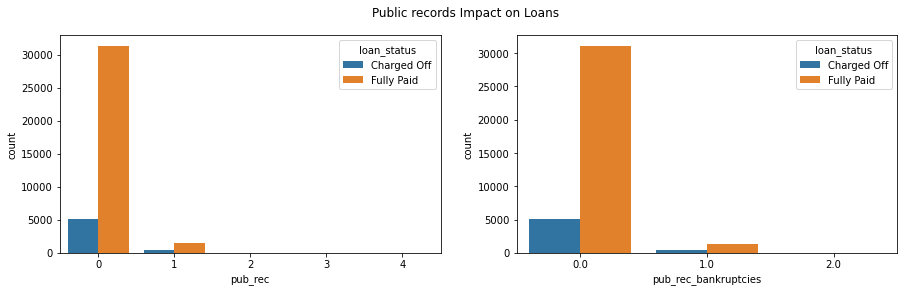

In [109]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.countplot(x='pub_rec', data=loans,hue='loan_status')

#Setting subplot index
plt.subplot(1,2,2)


sns.countplot(x='pub_rec_bankruptcies', data=loans,hue='loan_status')

#Single title for both subplots.
plt.suptitle('Public records Impact on Loans')
plt.show()

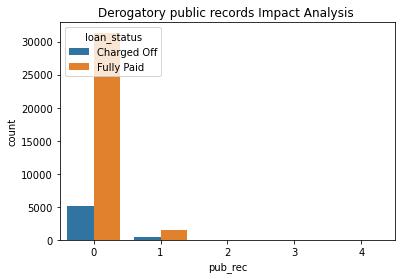

In [110]:
sns.countplot(x='pub_rec', data=loans,hue='loan_status').set(title='Derogatory public records Impact Analysis ')
plt.show()

## Quantitative Variables

Let's see the distribution of loan amount , funded amount and funded amount by investor using distribution plot.

In [111]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

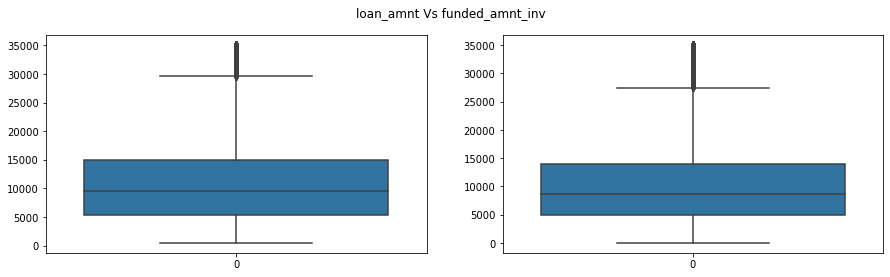

In [112]:
#Box plot
plt.figure(figsize=(15,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(data=loans['loan_amnt'])
#Setting subplot index
plt.subplot(1,2,2)
sns.boxplot(data=loans['funded_amnt_inv'])
plt.suptitle('loan_amnt Vs funded_amnt_inv')

plt.show()

**Observations:**
-  Utiliize <b>loan_amnt</b> for our  analysis, as both loan_amnt Vs funded_amnt_inv looks same

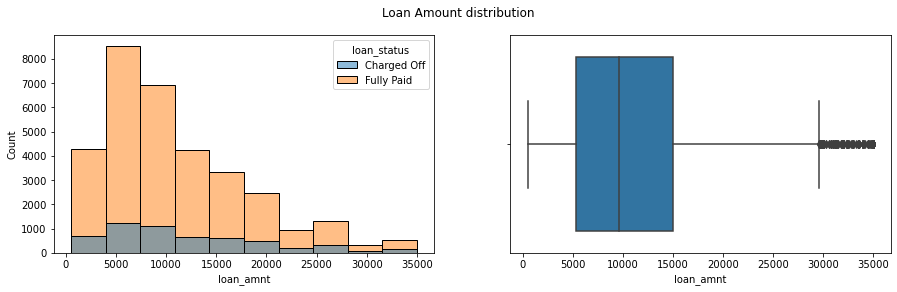

In [113]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.histplot(x='loan_amnt', data=loans,bins=10,hue='loan_status')

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(x='loan_amnt', data=loans)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


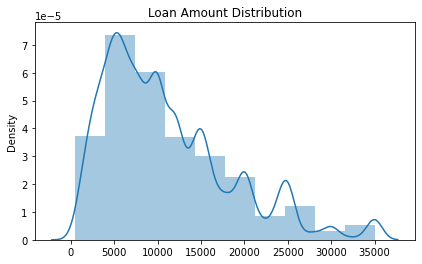

In [114]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(x=loans['loan_amnt'],bins=10).set(title='Loan Amount Distribution')#sns.distplot(x, rug=True, hist=False)


#Single title for both subplots.
#plt.suptitle('Loan Amount distribution')
plt.show()

**Observations:**
-  Most loan needs(loan_amnt) are  in the range of 5000 - 15000

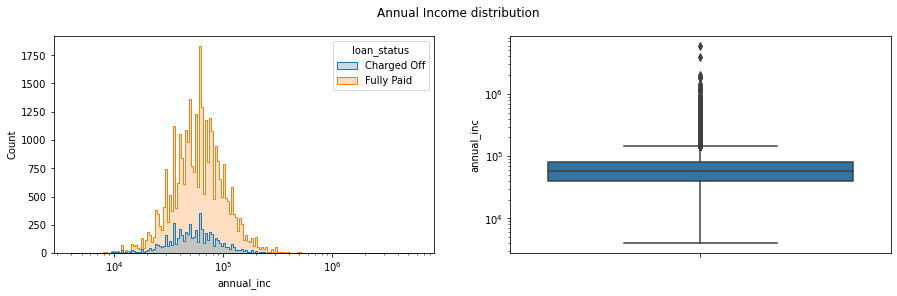

In [115]:
##Income Analysis


#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.histplot(x='annual_inc', data=loans,hue='loan_status',log_scale=True,element="step")



#Setting subplot index
plt.subplot(1,2,2)

#Box plotb
ax2=sns.boxplot(y='annual_inc', data=loans)
ax2.set(yscale="log")


#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

In [116]:
pd.options.display.float_format = "{:.2f}".format
loans['annual_inc'].describe()


count     38576.00
mean      68776.70
std       64219.03
min        4000.00
25%       40000.00
50%       58860.28
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

**Observations:**
Most of the applicants have income between 40000 to 60000.


In [117]:
##Employee Length Analysis

# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loans = loans[~loans['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loans['emp_length'] = loans['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loans['emp_length'] = loans['emp_length'].apply(lambda x: pd.to_numeric(x))

C:\Users\raman\AppData\Local\Temp/ipykernel_32024/2711679410.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['emp_length'] = loans['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
C:\Users\raman\AppData\Local\Temp/ipykernel_32024/2711679410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['emp_length'] = loans['emp_length'].apply(lambda x: pd.to_numeric(x))


In [118]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

In [119]:
loans['emp_length'].value_counts()

10    8487
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

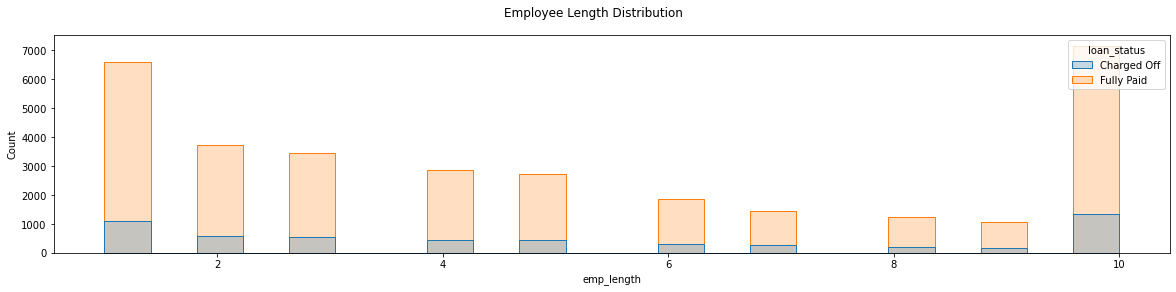

In [120]:
##Employee Length Analysis


#Setting up the figure size of the plot
plt.figure(figsize=(20,4))

#Setting subplot index
#plt.subplot(1,2,1)

#Distribution plot
sns.histplot(x='emp_length', data=loans,hue='loan_status',element="step")



#Single title for both subplots.
plt.suptitle('Employee Length Distribution')
plt.show()

In [121]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

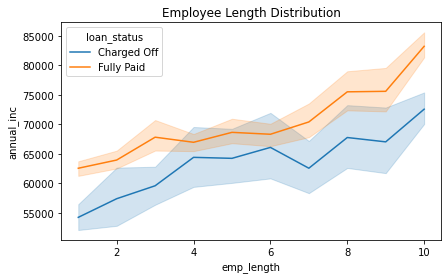

In [122]:
##Employee Length Analysis


#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.lineplot(x='emp_length',y='annual_inc', data=loans,hue='loan_status').set(title='Employee Length Distribution')



#Single title for both subplots.
#plt.suptitle('Employee Length Distribution')
plt.show()

In [123]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

In [124]:
emp_length_df=loans.groupby(by=["emp_length"])['loan_status'].value_counts(normalize=True)


In [125]:
emp_length_df

emp_length             
1           Fully Paid    0.86
            Charged Off   0.14
2           Fully Paid    0.87
            Charged Off   0.13
3           Fully Paid    0.86
            Charged Off   0.14
4           Fully Paid    0.86
            Charged Off   0.14
5           Fully Paid    0.86
            Charged Off   0.14
6           Fully Paid    0.86
            Charged Off   0.14
7           Fully Paid    0.85
            Charged Off   0.15
8           Fully Paid    0.86
            Charged Off   0.14
9           Fully Paid    0.87
            Charged Off   0.13
10          Fully Paid    0.84
            Charged Off   0.16
Name: loan_status, dtype: float64

In [126]:
emp_length_df=emp_length_df.reset_index()

In [127]:
emp_length_df

,emp_length,level_1,loan_status
0,1,Fully Paid,0.86
1,1,Charged Off,0.14
2,2,Fully Paid,0.87
3,2,Charged Off,0.13
4,3,Fully Paid,0.86
5,3,Charged Off,0.14
6,4,Fully Paid,0.86
7,4,Charged Off,0.14
8,5,Fully Paid,0.86
9,5,Charged Off,0.14


(0.0, 1.0)

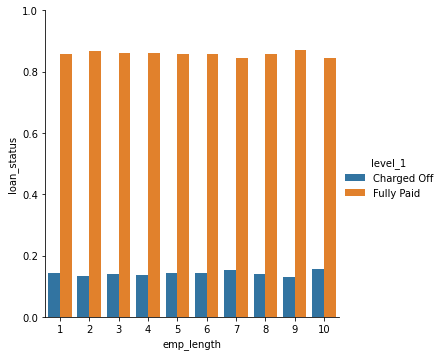

In [128]:
g = sns.catplot(x='emp_length', y='loan_status',hue='level_1', kind='bar', data=emp_length_df)
g.ax.set_ylim(0,1.0)

#### Observation

No Observation on employee length with status

#### Observation - TBD

No Observation on home_ownership with status

In [129]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

In [130]:
inq_df=loans.groupby(by=["inq_last_6mths"])['loan_status'].value_counts(normalize=True)


In [131]:
inq_df=inq_df.reset_index(name="Inquiry_Percent")

In [132]:
inq_df=inq_df[(inq_df['level_1']!='Fully Paid') & (inq_df['level_1']!='Current')] 

In [133]:
inq_df

,inq_last_6mths,level_1,Inquiry_Percent
1,0,Charged Off,0.12
3,1,Charged Off,0.16
5,2,Charged Off,0.16
7,3,Charged Off,0.20
9,4,Charged Off,0.15
11,5,Charged Off,0.19
13,6,Charged Off,0.25
15,7,Charged Off,0.28
17,8,Charged Off,0.21


In [134]:
getdatadefn('inq_last_6mths')

,LoanStatNew,Description
32,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


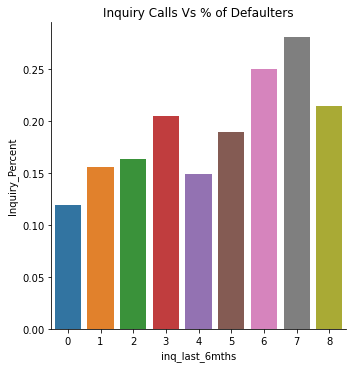

In [135]:
g = sns.catplot(x='inq_last_6mths', y='Inquiry_Percent', kind='bar', data=inq_df).set(title='Inquiry Calls Vs % of Defaulters')
#g.ax.set_ylim(0,0.4)
#plt.suptitle("Inquiry Calls Vs % of Defaulters")
plt.show()

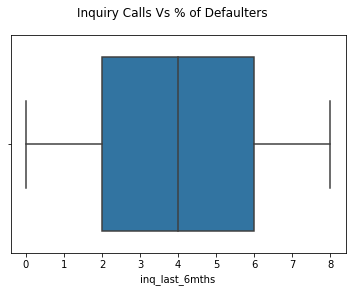

In [136]:
g = sns.boxplot(x='inq_last_6mths',   data=inq_df)
#g.ax.set_ylim(0,0.4)
plt.suptitle("Inquiry Calls Vs % of Defaulters")
plt.show()

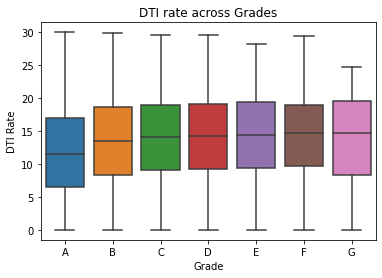

In [137]:
ax2=sns.boxplot(x="grade", y="dti", data=loans)
ax2.set(xlabel='Grade', ylabel='DTI Rate')
ax2.set_title('DTI rate across Grades')
plt.show()

In [138]:
getdatadefn('funded_amnt_inv')

,LoanStatNew,Description
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.


In [139]:
loans.groupby(by=["term","grade"])['loan_status'].value_counts()


term        grade             
 36 months  A      Fully Paid     8756
                   Charged Off     523
            B      Fully Paid     8153
                   Charged Off     933
            C      Fully Paid     4826
                   Charged Off     805
            D      Fully Paid     2606
                   Charged Off     564
            E      Fully Paid      685
                   Charged Off     172
            F      Fully Paid      152
                   Charged Off      55
            G      Fully Paid       35
                   Charged Off      21
 60 months  A      Fully Paid      345
                   Charged Off      35
            B      Fully Paid     1851
                   Charged Off     422
            C      Fully Paid     1555
                   Charged Off     483
            D      Fully Paid     1288
                   Charged Off     521
            E      Fully Paid     1235
                   Charged Off     528
            F      Fully Paid    

In [140]:
term_df=loans.groupby(by=["term","grade"])['loan_status'].value_counts(normalize=True)


In [141]:
term_df

term        grade             
 36 months  A      Fully Paid    0.94
                   Charged Off   0.06
            B      Fully Paid    0.90
                   Charged Off   0.10
            C      Fully Paid    0.86
                   Charged Off   0.14
            D      Fully Paid    0.82
                   Charged Off   0.18
            E      Fully Paid    0.80
                   Charged Off   0.20
            F      Fully Paid    0.73
                   Charged Off   0.27
            G      Fully Paid    0.62
                   Charged Off   0.38
 60 months  A      Fully Paid    0.91
                   Charged Off   0.09
            B      Fully Paid    0.81
                   Charged Off   0.19
            C      Fully Paid    0.76
                   Charged Off   0.24
            D      Fully Paid    0.71
                   Charged Off   0.29
            E      Fully Paid    0.70
                   Charged Off   0.30
            F      Fully Paid    0.66
                   

In [142]:
#inq_df=inq_df.rename(columns={"loan_status": "Inquiry_Percent","level_1": "loan_status"})

In [143]:
term_df=term_df.reset_index(name="Percent")

In [144]:
term_df

,term,grade,level_2,Percent
0,36 months,A,Fully Paid,0.94
1,36 months,A,Charged Off,0.06
2,36 months,B,Fully Paid,0.90
3,36 months,B,Charged Off,0.10
4,36 months,C,Fully Paid,0.86
5,36 months,C,Charged Off,0.14
6,36 months,D,Fully Paid,0.82
7,36 months,D,Charged Off,0.18
8,36 months,E,Fully Paid,0.80
9,36 months,E,Charged Off,0.20


In [145]:
#term_df=term_df[(term_df['level_2']!='Fully Paid') & (term_df['level_2']!='Current')] 

C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


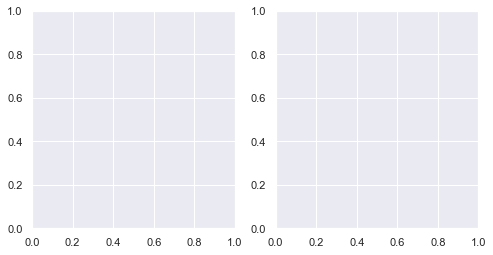

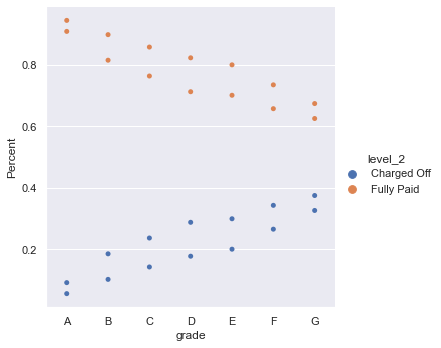

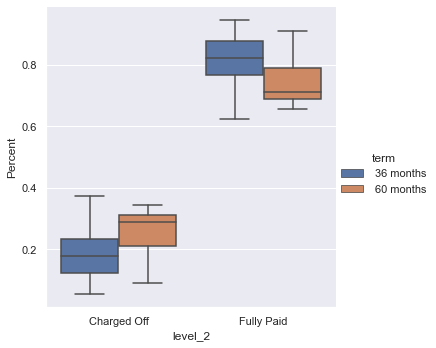

In [146]:
##Income Analysis


sns.set()
fig, axes = plt.subplots(1, 2,figsize=(8,4))


sns.catplot(x='grade', y='Percent',kind="swarm",  hue='level_2', data=term_df,ax=axes[0])



#Box plotb
sns.catplot(x='level_2', y='Percent',kind="box",  hue='term', data=term_df,ax=axes[1])
#ax2.set(yscale="log")


#Single title for both subplots.
#plt.suptitle('Annual Income distribution')
plt.show()

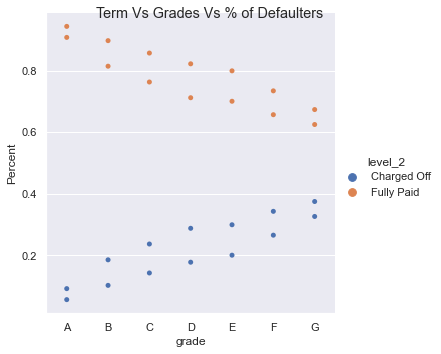

In [147]:
g = sns.catplot(x='grade', y='Percent',kind="swarm",  hue='level_2', data=term_df)
#g.ax.set_ylim(0,1.0)
plt.suptitle("Term Vs Grades Vs % of Defaulters")
plt.show()

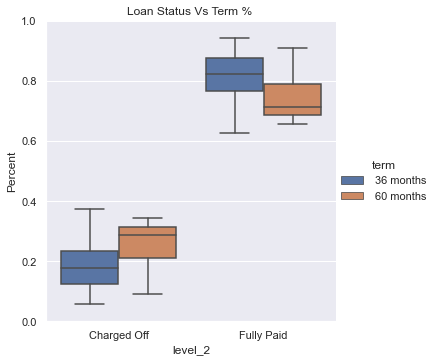

In [148]:
g = sns.catplot(x='level_2', y='Percent',kind="box",  hue='term', data=term_df)
g.set(title='Loan Status Vs Term % ')
g.ax.set_ylim(0,1.0)
#plt.suptitle("Loan Status Vs Term % ")
plt.show()

*Observations*
- Defaulters increases with Grade <br>
- Fully Paided are more in short Term where as Defaulters are more in 60 months

<AxesSubplot:>

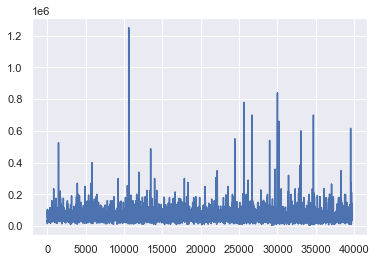

In [149]:
loans[loans['loan_status']=='Charged Off']['annual_inc'].plot()

In [150]:
tmp = loans[loans['loan_status']=='Charged Off']['annual_inc']

In [151]:
tmp.shape

(5399,)

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

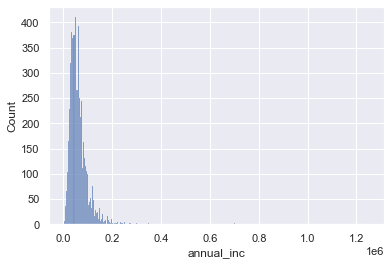

In [152]:
sns.histplot( data=tmp)

# Multivariate Analysis

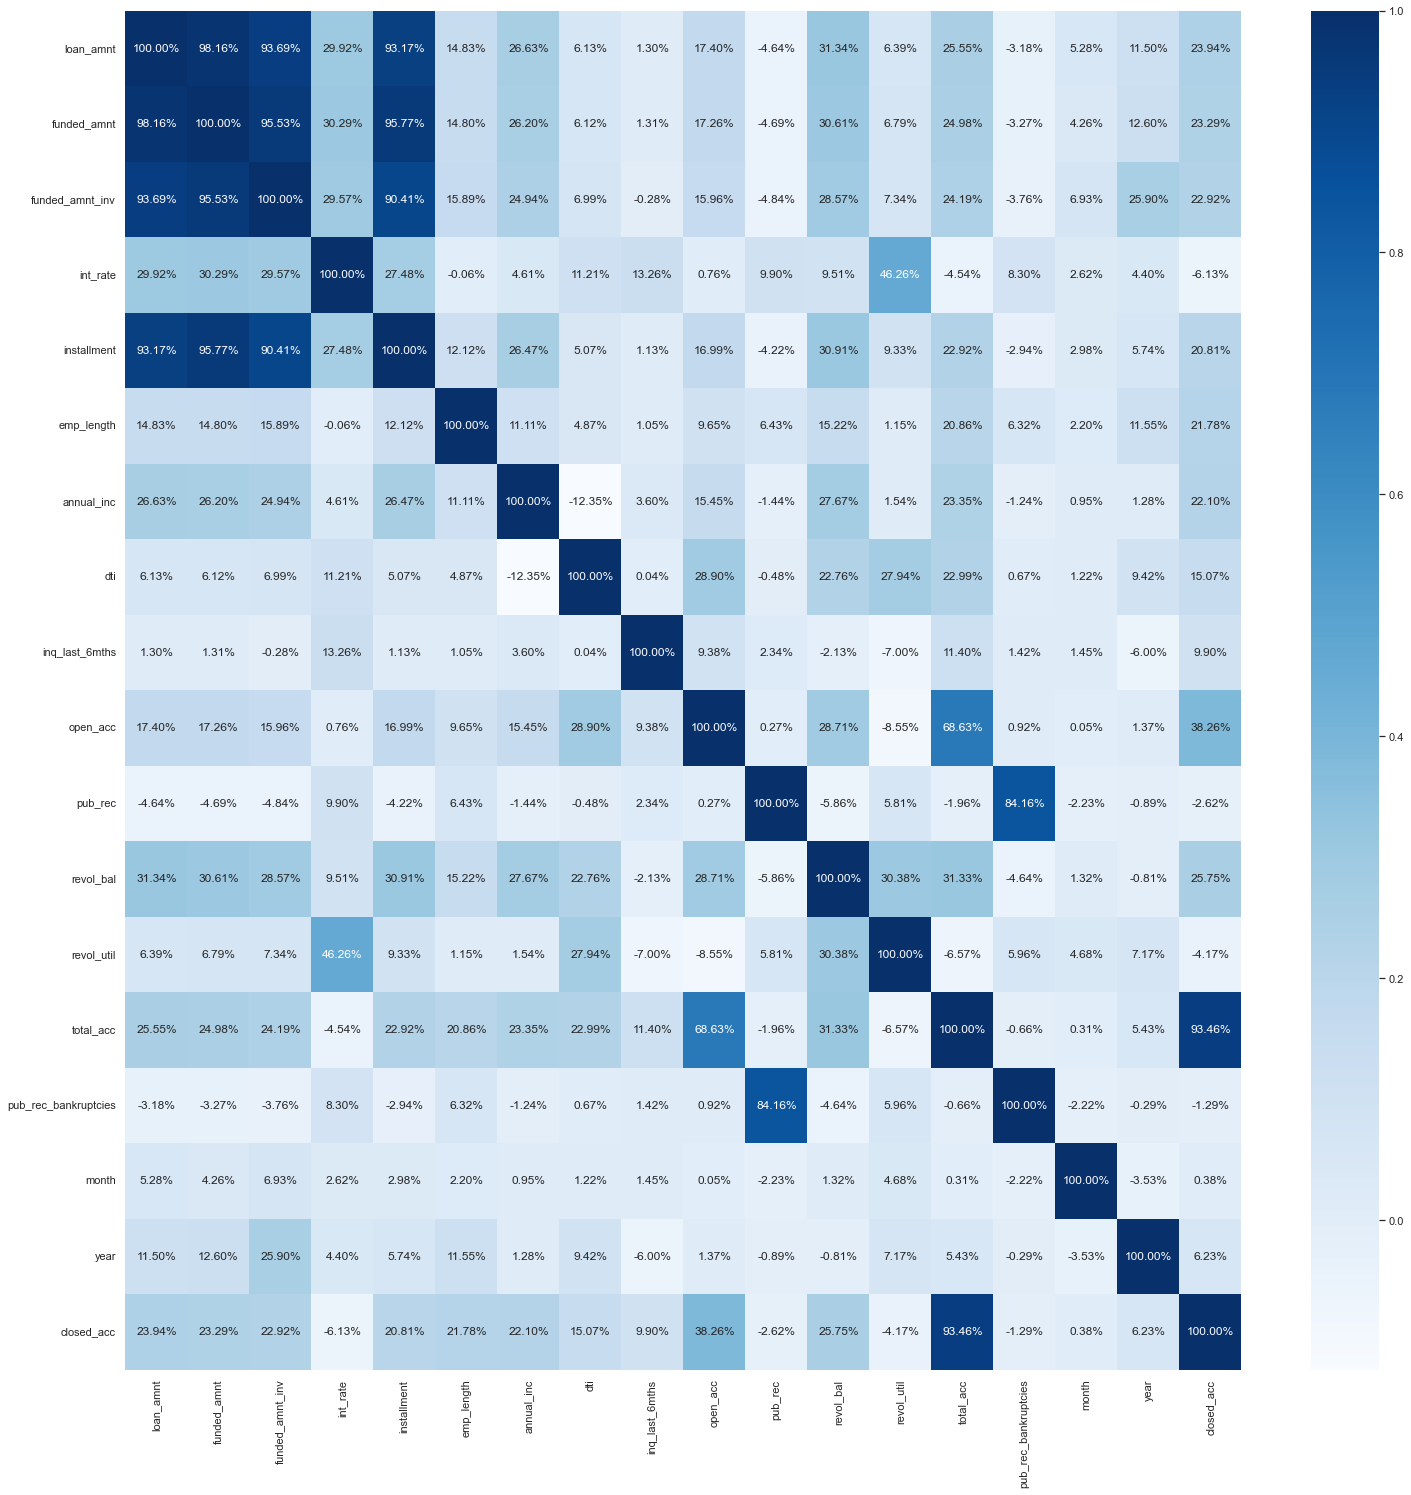

In [153]:
## Creating graph for correlation
corrData = loans.corr()

plt.figure(figsize=[25,25])
sns.heatmap(corrData, cmap="Blues", fmt='.2%', annot=True)
plt.show()


In [154]:
loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,month,year,closed_acc
count,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,37543.00,36847.00,37543.00,37543.00,37543.00
mean,11119.57,10853.80,10280.73,11.96,324.66,5.06,69405.79,13.28,0.87,9.30,0.05,13363.93,48.80,22.08,0.04,7.11,2010.30,12.79
std,7354.05,7096.26,7034.07,3.68,208.90,3.40,64677.36,6.66,1.07,4.40,0.23,15895.12,28.38,11.42,0.20,3.41,0.89,8.99
min,500.00,500.00,0.00,5.42,15.69,1.00,4000.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,1.00,2007.00,0.00
25%,5500.00,5400.00,5000.00,8.94,167.38,2.00,41000.00,8.16,0.00,6.00,0.00,3693.00,25.30,13.00,0.00,4.00,2010.00,6.00
50%,10000.00,9600.00,8850.00,11.83,280.00,4.00,60000.00,13.38,1.00,9.00,0.00,8841.00,49.20,20.00,0.00,7.00,2011.00,11.00
75%,15000.00,15000.00,14075.00,14.42,428.98,9.00,83000.00,18.55,1.00,12.00,0.00,17009.00,72.40,29.00,0.00,10.00,2011.00,18.00
max,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,8.00,44.00,4.00,149588.00,99.90,90.00,2.00,12.00,2011.00,75.00


In [155]:
loans['open_acc'].value_counts()

7     3822
6     3731
8     3716
9     3524
10    3030
5     2994
11    2611
4     2215
12    2163
13    1810
3     1408
14    1386
15    1119
16     895
17     695
2      555
18     504
19     381
20     277
21     229
22     131
23      91
24      71
25      53
26      29
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

In [156]:
getdatadefn('revol_util')

,LoanStatNew,Description
91,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."


In [157]:
loans['revol_util'].value_counts(sort=False)

83.70    38
9.40     37
98.50    25
21.00    40
28.30    37
         ..
36.94     1
5.34      1
49.63     1
0.04      1
7.28      1
Name: revol_util, Length: 1086, dtype: int64

In [158]:
loans

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,month,year,closed_acc
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,...,1,3,0,13648,83.70,9,0.00,12,2011,6
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,...,5,3,0,1687,9.40,4,0.00,12,2011,1
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,...,2,2,0,2956,98.50,10,0.00,12,2011,8
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,...,1,10,0,5598,21.00,37,0.00,12,2011,27
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,...,3,9,0,7963,28.30,12,0.00,12,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.00,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,0,13,0,7274,13.10,40,NaN,7,2007,27
39713,8500,8500,875.00,36 months,10.28,275.38,C,C1,3,RENT,...,1,6,0,8847,26.90,9,NaN,7,2007,3
39714,5000,5000,1325.00,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,0,11,0,9698,19.40,20,NaN,7,2007,9
39715,5000,5000,650.00,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,0,17,0,85607,0.70,26,NaN,7,2007,9


In [159]:
getdatadefn('pub_rec')

,LoanStatNew,Description
85,pub_rec,Number of derogatory public records


In [160]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'closed_acc'],
      dtype='object')

In [161]:
loans['pub_rec'].value_counts()

0    35592
1     1896
2       46
3        7
4        2
Name: pub_rec, dtype: int64

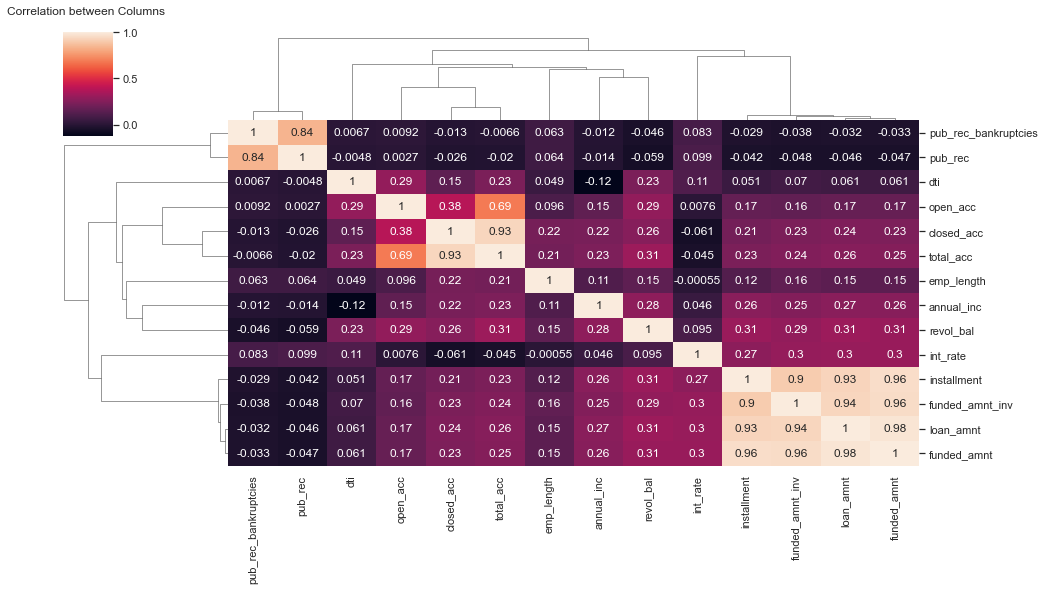

In [162]:
#finding correlation matrix
data_correlation = loans[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','emp_length','installment', 'int_rate', 'open_acc','closed_acc','total_acc','annual_inc', 'revol_bal',  'dti','pub_rec_bankruptcies','pub_rec']].corr()
#plotting correaltion matrix on clustermap
sns.clustermap(data_correlation,annot=True,figsize=(14, 8))
plt.title("Correlation between Columns \n")
plt.show()

##### Observations
- <b>loan_amnt , funded_amnt_inv, installment, funded_amnt</b> are strongly correlated.
- <b>total_acct, closed_acct, open_acct</b> are positively correlated.
- <b> int_rate <b> is negatively correlated with <b>emp_length, Credit lines (total_acct,closed_acct, open_acct) </b>
- <b>annual_inc and dti</b> is negatively correlated.
- <b> pub_rec_bankruptcies &amp; pub_rec </b> are negatively correlated with <b>loan_amnt, funded_amnt, funded_amnt_inv. annual_inc,total_acct</b>
- DTI and annual income have negative correlation so increase in salary will decrease DTI and hence increase chances of loan approval.
